In [11]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set style for seaborn
sns.set(style="whitegrid")

# Ignore warnings


In [2]:
# 2. Load the Dataset
df = pd.read_csv("synthetic_covid19_data.csv")
df.head()

,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,positive_rate,...,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence
0,2021-11-19,Asia,India,6423388,2490,107051,323,60016385,7386,0.904377,...,69.259331,1241418161,67.394702,49.883751,8.649395,16.052063,44313.199955,20.827286,177.832655,16.296474
1,2021-09-12,North America,Russia,6550634,6980,481184,697,28666409,6862,0.525850,...,7.185287,114516392,694.409929,30.126823,8.957854,4.423022,8196.945011,20.478579,470.991420,8.579170
2,2020-04-20,Europe,Canada,4304572,9134,15116,325,80352550,40108,0.791575,...,14.823246,1152898402,784.464729,22.648063,9.336778,18.776372,52607.000057,11.924664,415.880908,14.989789
3,2022-10-16,Asia,Germany,2234489,7661,20045,624,89212990,91788,0.115291,...,70.007502,1342525124,403.467508,42.951109,5.321894,10.526520,23297.985037,4.591400,643.510444,18.084096
4,2021-05-15,Europe,USA,9958614,1724,419543,824,5364240,75023,0.927643,...,28.972334,744943966,182.869692,26.414731,19.321761,15.889173,56126.828895,5.431330,451.846790,5.971409


In [3]:
# 3. Initial Exploration
print(df.shape)
print(df.columns)

# Check for missing values
df.isnull().sum().sort_values(ascending=False).head(15)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# View unique countries
df['location'].nunique(), df['location'].unique()[:10]

(3000, 27)
Index(['date', 'continent', 'location', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_tests', 'new_tests',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'hosp_patients',
       'icu_patients', 'reproduction_rate', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence'],
      dtype='object')


(10,
 array(['India', 'Russia', 'Canada', 'Germany', 'USA', 'France', 'Brazil',
        'Italy', 'Japan', 'UK'], dtype=object))

In [14]:
# 4. Filter Countries of Interest
countries = ['Kenya', 'United States', 'India', 'Brazil', 'Germany']
df_countries = df[df['location'].isin(countries)]

# Drop rows with missing critical values
df_countries = df_countries.dropna(subset=['total_cases', 'total_deaths'])

# Fill missing numeric values for smoother graphs
df_countries = df_countries.ffill()

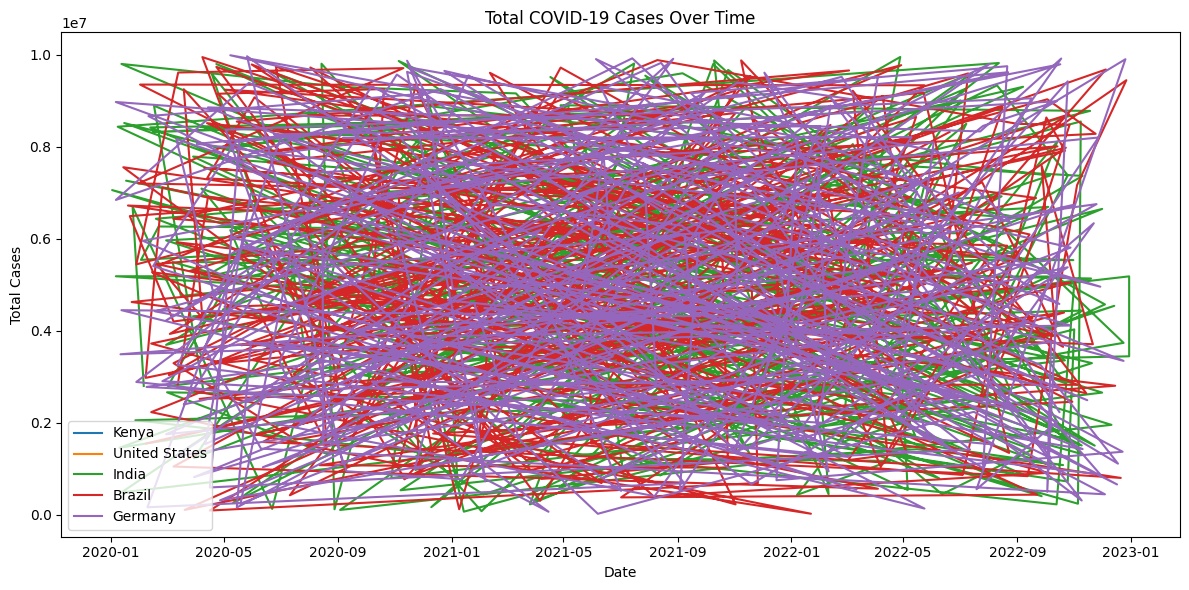

In [5]:
# 5. Plot Total Cases Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    country_df = df_countries[df_countries['location'] == country]
    plt.plot(country_df['date'], country_df['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

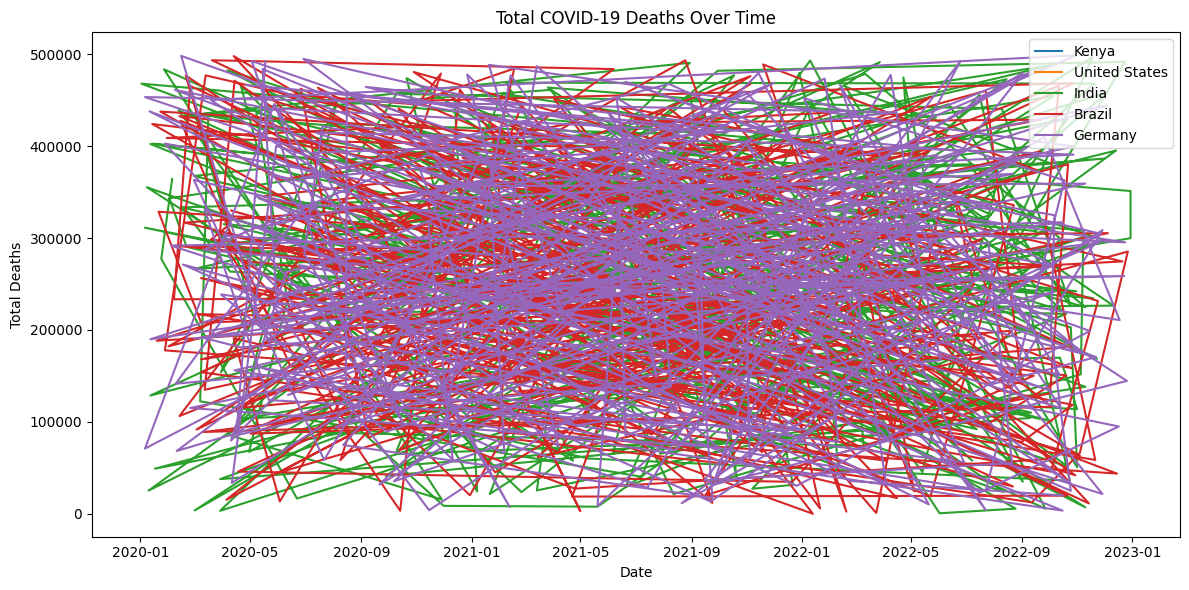

In [6]:
# 6. Plot Total Deaths Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    country_df = df_countries[df_countries['location'] == country]
    plt.plot(country_df['date'], country_df['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()

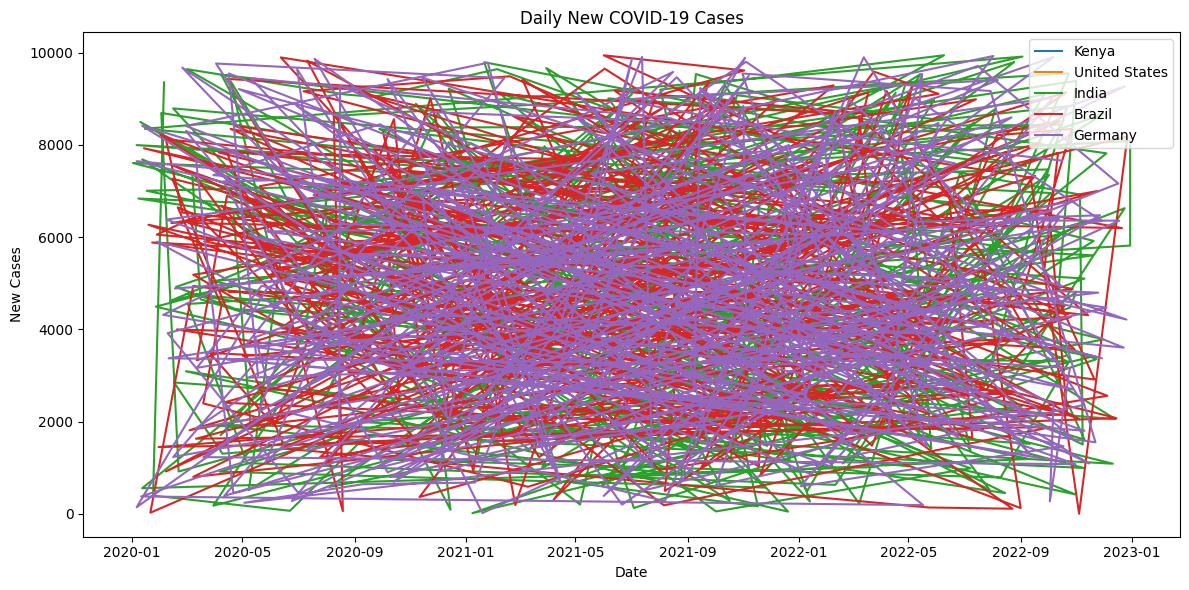

In [7]:
# 7. Daily New Cases Comparison
plt.figure(figsize=(12, 6))
for country in countries:
    country_df = df_countries[df_countries['location'] == country]
    plt.plot(country_df['date'], country_df['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()

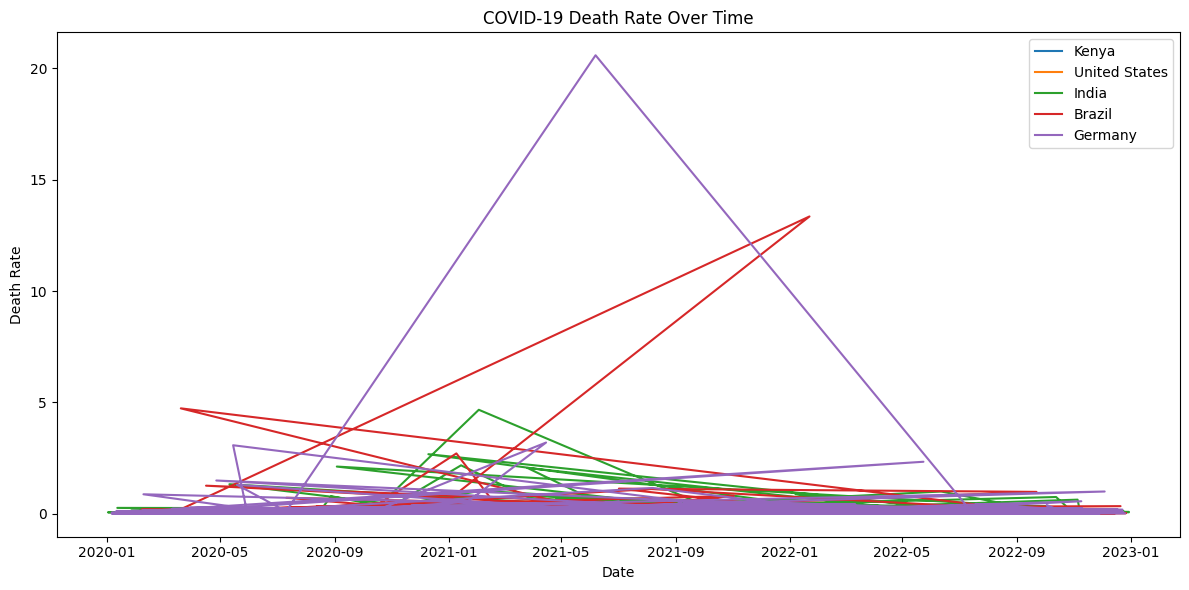

In [8]:
# 8. Death Rate Analysis
df_countries['death_rate'] = df_countries['total_deaths'] / df_countries['total_cases']

plt.figure(figsize=(12, 6))
for country in countries:
    country_df = df_countries[df_countries['location'] == country]
    plt.plot(country_df['date'], country_df['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()

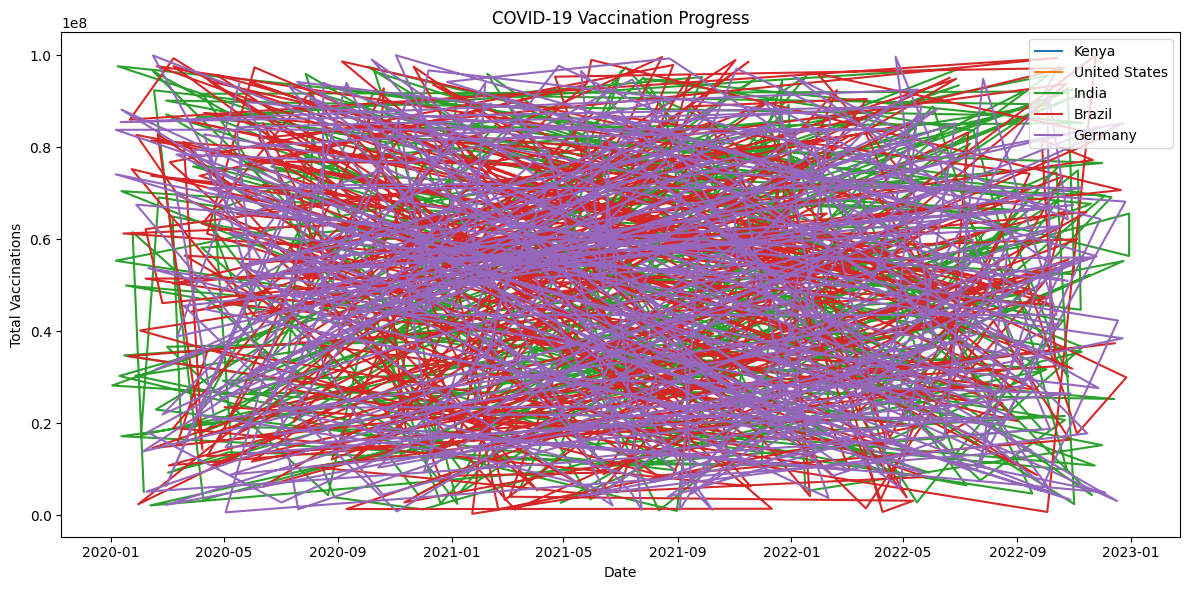

In [9]:
# 9. Vaccination Progress
plt.figure(figsize=(12, 6))
for country in countries:
    country_df = df_countries[df_countries['location'] == country]
    plt.plot(country_df['date'], country_df['total_vaccinations'], label=country)

plt.title('COVID-19 Vaccination Progress')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()